In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io
from urllib.request import urlopen
import re

In [119]:
r = urlopen('https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip').read()
file = ZipFile(io.BytesIO(r))
df = pd.read_csv(file.open('survey_results_public.csv'))
df.head(1)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df = df.drop(list(df)[23:83], axis=1)
df = df.drop(['ResponseId', 'Q120', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'DevType', 'OrgSize', 
              'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal'], axis = 1 )
df.head(2)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,ConvertedCompYearly
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,285000.0


In [121]:
#YearsCode

df["YearsCode"] = np.where(df["YearsCode"].str.contains('NA'), '-1.0',df["YearsCode"])
df["YearsCode"] = np.where(df["YearsCode"].str.contains('Less than 1 year'), '0.0',df["YearsCode"])
df["YearsCode"] = np.where(df["YearsCode"].str.contains('More than 50 years'), '51.0',df["YearsCode"])
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce')
counts = df["YearsCode"].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts = counts.sort_values(by=['unique_values'])
print(counts)

    unique_values  counts
18           -1.0    1749
26            0.0     968
23            1.0    1294
11            2.0    2826
7             3.0    4269
5             4.0    4466
1             5.0    5415
2             6.0    4893
4             7.0    4800
3             8.0    4879
10            9.0    3130
0            10.0    6521
14           11.0    2519
9            12.0    3471
13           13.0    2601
15           14.0    2278
6            15.0    4336
17           16.0    1842
20           17.0    1544
19           18.0    1690
28           19.0     826
8            20.0    4021
29           21.0     761
24           22.0    1210
21           23.0    1327
27           24.0     959
12           25.0    2685
32           26.0     706
31           27.0     710
30           28.0     715
40           29.0     324
16           30.0    2078
43           31.0     272
34           32.0     444
33           33.0     496
39           34.0     333
25           35.0    1118
42          

53


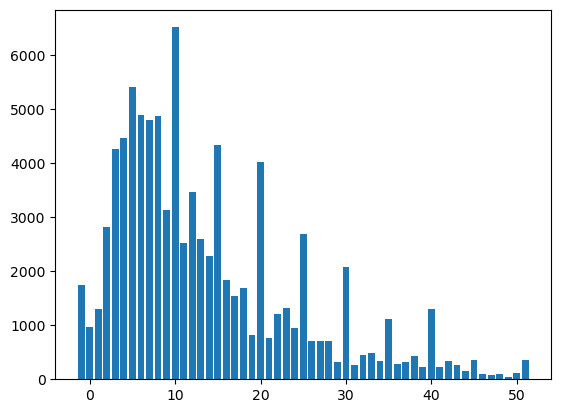

In [122]:
unique = counts['unique_values']
count1 = counts['counts']
print(len(count1))
plt.bar(unique, count1)
plt.show()

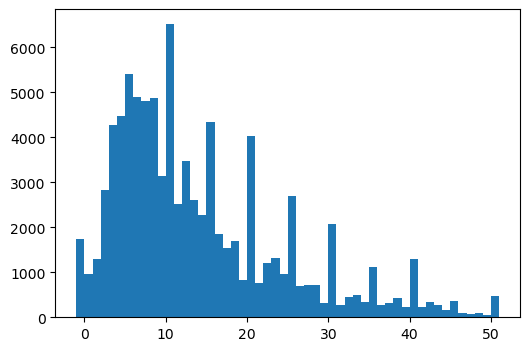

In [123]:


fig, ax = plt.subplots(figsize = (6,4))
plt.hist(df["YearsCode"], bins = 52)
plt.show()

In [124]:

weighting = counts['counts'].tolist()
print(weighting)


[1749, 968, 1294, 2826, 4269, 4466, 5415, 4893, 4800, 4879, 3130, 6521, 2519, 3471, 2601, 2278, 4336, 1842, 1544, 1690, 826, 4021, 761, 1210, 1327, 959, 2685, 706, 710, 715, 324, 2078, 272, 444, 496, 333, 1118, 282, 312, 428, 229, 1302, 227, 347, 265, 160, 360, 101, 79, 96, 42, 125, 353]


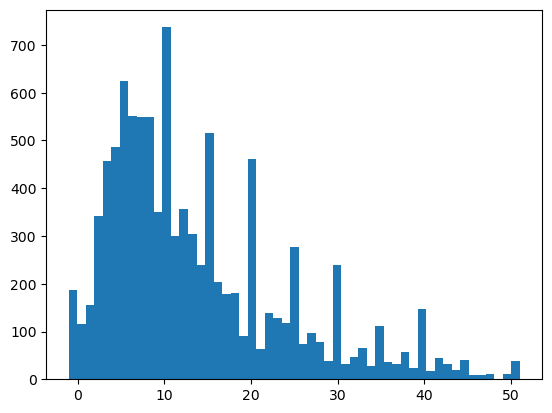

In [130]:
import random
s_list = []
for i in range(-1,52):
        s_list.append(i)

r_list = random.choices(s_list, weights=(weighting), k=10000)
#print(len(weight))


plt.hist(r_list, bins = 53)
plt.show()
